In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util import bath_correlation_function
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.hops import hops

In [3]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

# Linear HOPS

Without noise:


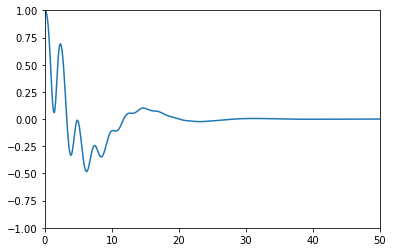

With noise:


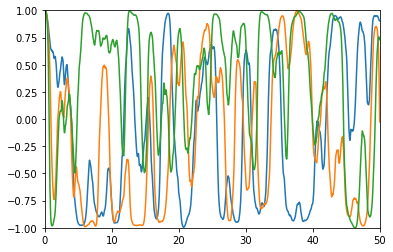

In [4]:
N_steps = 1000
N_trunc = 4
options = {
    'linear' : True,
    'use_noise' : False,
    'method' : 'Trotter'
}

print("Without noise:")
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
psis = my_hops.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
options['use_noise'] = True
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
for i in range(3):
    psis = my_hops.compute_realizations(1)
    sigma_zs = compute_exp_val_linear(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [11]:
N_steps = 1000
N_trunc = 16
options = {
    'linear' : True,
    'use_noise' : True,
    'method' : 'Trotter'
}

In [12]:
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)

In [14]:
psis_linear_100 = my_hops.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [68]:
psis_linear_1000 = hops.compute_realizations(N_samples=1000, progressBar=tqdm)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
sigma_zs_linear_100 = compute_exp_val_linear(psis_linear_100, sigma_z)
#sigma_zs_linear_1000 = compute_exp_val_linear(psis_linear_1000, sigma_z)

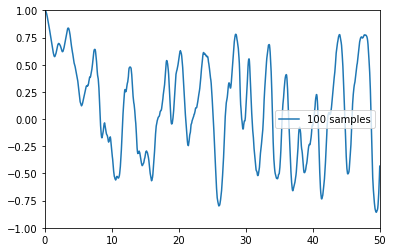

In [16]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_linear_100, label="100 samples")
#plt.plot(np.linspace(0, duration, N_steps), sigma_zs_linear_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

# Non-Linear HOPS

Without noise:


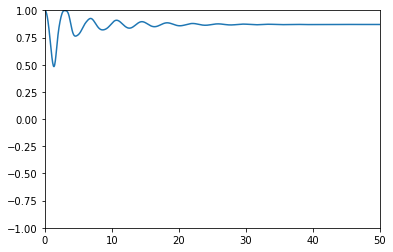

With noise:


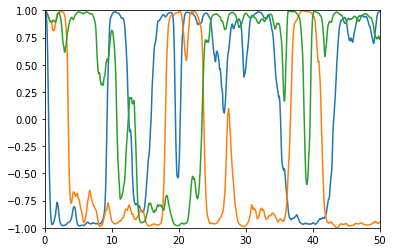

In [19]:
N_steps = 1000
N_trunc = 4
options = {
    'linear' : False,
    'use_noise' : False,
    'method' : 'Trotter'
}

print("Without noise:")
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
psis = my_hops.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
options['use_noise'] = True
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
for i in range(3):
    psis = my_hops.compute_realizations(1)
    sigma_zs = compute_exp_val_linear(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [20]:
N_steps = 1000
N_trunc = 16
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'Trotter'
}

In [21]:
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)

In [22]:
psis_nonlinear_100 = my_hops.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
psis_nonlinear_1000 = hops.compute_realizations(N_samples=1000, progressBar=tqdm)

In [26]:
sigma_zs_nonlinear_100 = compute_exp_val_nonlinear(psis_nonlinear_100, sigma_z)
#sigma_zs_nonlinear_1000 = compute_exp_val_nonlinear(psis_nonlinear_1000, sigma_z)

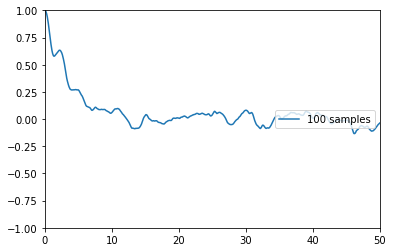

In [27]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_nonlinear_100, label="100 samples")
#plt.plot(np.linspace(0, duration, N_steps), sigma_zs_nonlinear_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

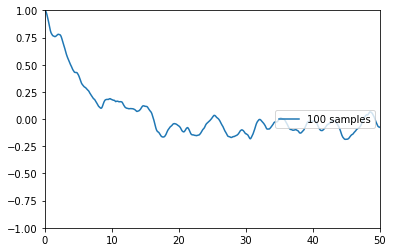

In [182]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_nonlinear_100, label="100 samples")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_nonlinear_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

# Fine-tuned comparison (linear)

In [219]:
N_steps = 1000
N_trunc = 16
options = {
    'linear' : True,
    'use_noise' : True,
    'method' : 'Trotter'
}

In [220]:
options['method'] = 'RK4'
hops_rk = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
options['method'] = 'Trotter'
hops_trotter = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)

In [221]:
zts = hops_rk.generator.sample_process()

In [222]:
psis_trotter = hops_trotter.compute_realizations(1, zts_debug=zts[0::2])
psis_rk = hops_rk.compute_realizations(1, zts_debug=zts)

In [223]:
sigma_zs_trotter = compute_exp_val_linear(psis_trotter, sigma_z)
sigma_zs_rk = compute_exp_val_linear(psis_rk, sigma_z)

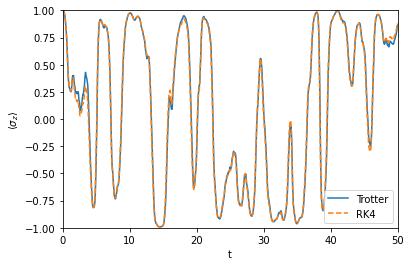

In [224]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_trotter, label="Trotter")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_rk, "--", label="RK4")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

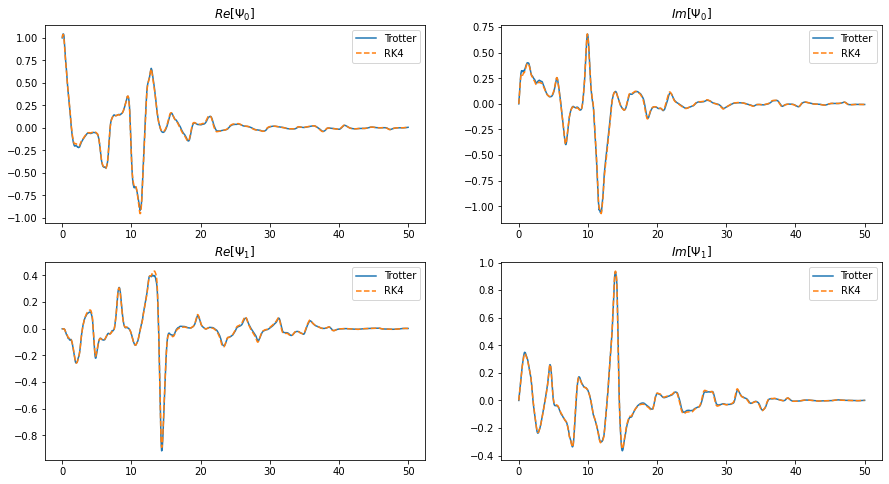

In [225]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))

axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_trotter[0, :, 0]), label="Trotter")
axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_rk[0, :, 0]), "--", label="RK4")
axarray[0][0].legend()
axarray[0][0].set_title(r"$Re\left[\Psi_0\right]$")

axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_trotter[0, :, 0]), label="Trotter")
axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_rk[0, :, 0]), "--", label="RK4")
axarray[0][1].legend()
axarray[0][1].set_title(r"$Im\left[\Psi_0\right]$")

axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_trotter[0, :, 1]), label="Trotter")
axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_rk[0, :, 1]), "--", label="RK4")
axarray[1][0].legend()
axarray[1][0].set_title(r"$Re\left[\Psi_1\right]$")

axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_trotter[0, :, 1]), label="Trotter")
axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_rk[0, :, 1]), "--", label="RK4")
axarray[1][1].legend()
axarray[1][1].set_title(r"$Im\left[\Psi_1\right]$")

plt.show()

# Fine-tuned comparison (non-linear)

In [112]:
N_steps = 100000
N_trunc = 16
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'Trotter'
}

In [113]:
options['method'] = 'RK4'
hops_rk = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
options['method'] = 'Trotter'
hops_trotter = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)

In [114]:
zts = hops_rk.generator.sample_process()

In [115]:
psis_trotter = hops_trotter.compute_realizations(1, zts_debug=zts[0::2])
psis_rk = hops_rk.compute_realizations(1, zts_debug=zts)

In [116]:
sigma_zs_trotter = compute_exp_val_linear(psis_trotter, sigma_z)
sigma_zs_rk = compute_exp_val_linear(psis_rk, sigma_z)

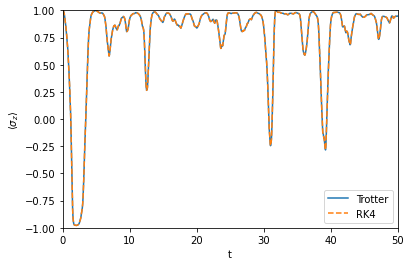

In [117]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_trotter, label="Trotter")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_rk, "--", label="RK4")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

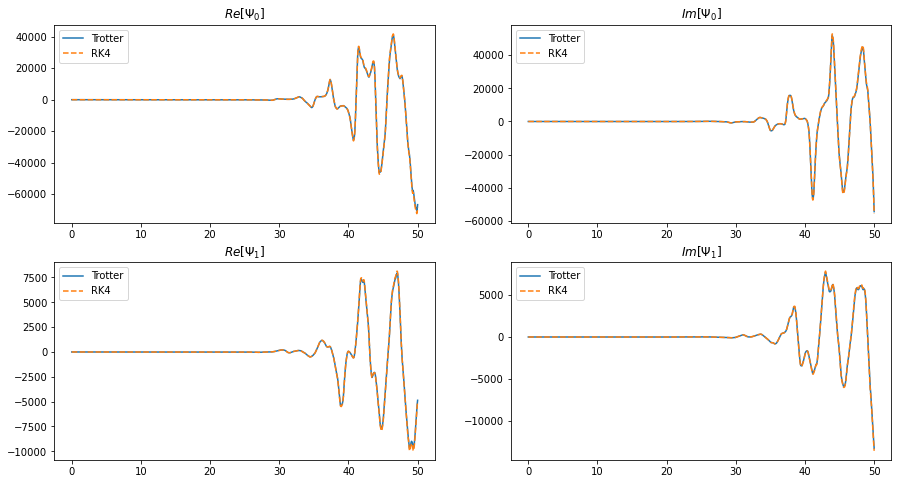

In [118]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))

axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_trotter[0, :, 0]), label="Trotter")
axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_rk[0, :, 0]), "--", label="RK4")
axarray[0][0].legend()
axarray[0][0].set_title(r"$Re\left[\Psi_0\right]$")

axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_trotter[0, :, 0]), label="Trotter")
axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_rk[0, :, 0]), "--", label="RK4")
axarray[0][1].legend()
axarray[0][1].set_title(r"$Im\left[\Psi_0\right]$")

axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_trotter[0, :, 1]), label="Trotter")
axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_rk[0, :, 1]), "--", label="RK4")
axarray[1][0].legend()
axarray[1][0].set_title(r"$Re\left[\Psi_1\right]$")

axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_trotter[0, :, 1]), label="Trotter")
axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_rk[0, :, 1]), "--", label="RK4")
axarray[1][1].legend()
axarray[1][1].set_title(r"$Im\left[\Psi_1\right]$")

plt.show()

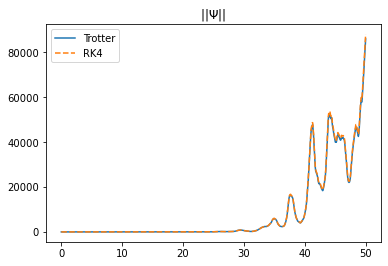

In [121]:
plt.plot(np.linspace(0, duration, N_steps), np.abs(psis_trotter[0, :, 0]), label="Trotter")
plt.plot(np.linspace(0, duration, N_steps), np.abs(psis_rk[0, :, 0]), "--", label="RK4")
plt.legend()
#plt.yscale("log")
plt.title("$||\Psi||$")
plt.show()

When using 10'000 steps we get a better convergence. For 1'000 steps the expectation value of z is still really good but the norm of the wavefunction does not compare very well!

When using even more steps (100'000), also the norm of the wavefunction is conserved. 

# Test if the memory terms are updated correctly

In [61]:
N_steps = 1000
N_trunc = 16
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'Trotter'
}

In [62]:
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)

In [63]:
psis = my_hops.compute_realizations(1, compute_debug_info=True)

In [64]:
# compute memory by approximating the integrals with sums
def compute_memory(psis, t_index, expLs):
    result = np.array([0], dtype=complex)
    for s_index in range(t_index):
        result += np.conj(bath_correlation_function.alpha(my_hops.ts[t_index] - my_hops.ts[s_index], g, w)) * expLs[s_index]
    return (result * my_hops.dt).item()

In [65]:
memory_compare = []
expLs = []
for t_index in tqdm(range(N_steps)):
    expLs.append(np.real_if_close((np.conj(psis[0, t_index, :]).T@sigma_z@psis[0, t_index, :])/(np.conj(psis[0, t_index, :]).T@psis[0, t_index, :]))) 
for t_index in tqdm(range(N_steps)):
    memory_compare.append(compute_memory(psis, t_index, expLs))

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

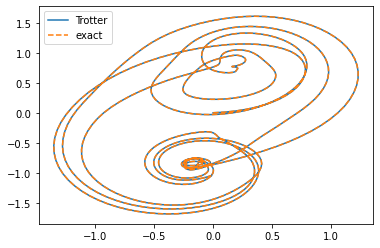

In [67]:
plt.plot(np.real(my_hops.debug_info['memory'][0, :]), np.imag(my_hops.debug_info['memory'][0, :]), "-", label="Trotter")
plt.plot(np.real(memory_compare), np.imag(memory_compare), "--", label="exact")
plt.legend()
plt.show()

# Memory and expL comparison

In [68]:
N_steps = 1000
N_trunc = 16
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'Trotter'
}

In [69]:
options['method'] = 'RK4'
hops_rk = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
options['method'] = 'Trotter'
hops_trotter = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)

In [70]:
zts = hops_rk.generator.sample_process()

In [71]:
psis_rk = hops_rk.compute_realizations(1, zts_debug=zts, compute_debug_info=True)
psis_trotter = hops_trotter.compute_realizations(1, zts_debug=zts[0::2], compute_debug_info=True)

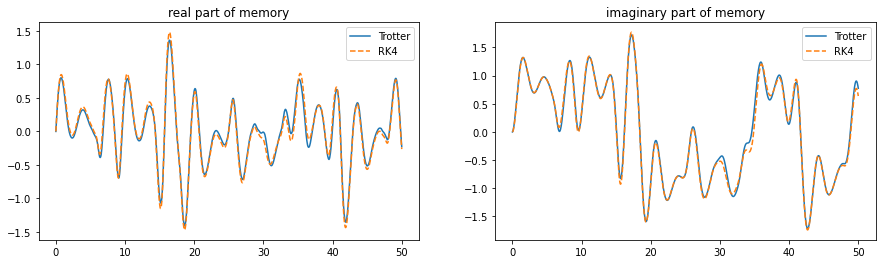

In [72]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))

axarray[0].plot(np.linspace(0, duration, N_steps), np.real(hops_trotter.debug_info['memory'][0]), label="Trotter")
axarray[0].plot(np.linspace(0, duration, N_steps), np.real(hops_rk.debug_info['memory'][0]), "--", label="RK4")
axarray[0].legend()
axarray[0].set_title("real part of memory")

axarray[1].plot(np.linspace(0, duration, N_steps), np.imag(hops_trotter.debug_info['memory'][0]), label="Trotter")
axarray[1].plot(np.linspace(0, duration, N_steps), np.imag(hops_rk.debug_info['memory'][0]), "--", label="RK4")
axarray[1].legend()
axarray[1].set_title("imaginary part of memory")

plt.show()

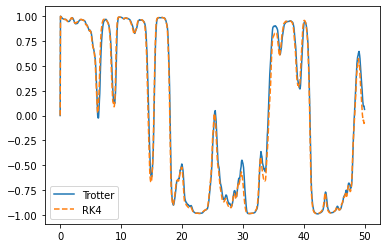

In [73]:
plt.plot(np.linspace(0, duration, N_steps), hops_trotter.debug_info['expL'][0], label="Trotter")
plt.plot(np.linspace(0, duration, N_steps), hops_rk.debug_info['expL'][0], "--", label="RK4")
plt.legend()
plt.show()